**TASK - 1**

Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

In [1]:
import pandas as pd

# Load the dataset with semicolon delimiter and header row
df = pd.read_csv("/content/homele.csv", delimiter=';')

# Display the first few rows and column names to confirm
print(df.head())
print(df.columns)

     sex age_group      type_of_death  2020  2019  2018  2017  2016  2015  \
0  Males  All ages  Identified deaths   430   497   478   414   414   379   
1  Males     15-19  Identified deaths     2     1     6     2     6     2   
2  Males     20-24  Identified deaths    11    11    16    10    15    16   
3  Males     25-29  Identified deaths    28    26    23    29    29    28   
4  Males     30-34  Identified deaths    37    42    53    42    35    40   

   2014  2013  
0   348   360  
1     5     3  
2    14    11  
3    22    22  
4    38    45  
Index(['sex', 'age_group', 'type_of_death', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013'],
      dtype='object')


In [3]:
year_columns = [str(year) for year in range(2013, 2021)]
df_melted = df.melt(id_vars=['sex', 'age_group', 'type_of_death'], value_vars=year_columns, var_name='Year', value_name='Count')

# Group by sex and age_group and sum the counts
age_gender_counts = df_melted.groupby(['sex', 'age_group'])['Count'].sum().reset_index()

# Display the results
print(age_gender_counts)

        sex age_group  Count
0   Females     15-19      8
1   Females     20-24     39
2   Females     25-29     88
3   Females     30-34    146
4   Females     35-39    167
5   Females     40-44    195
6   Females     45-49    144
7   Females     50-54    115
8   Females     55-59     53
9   Females     60-64     43
10  Females     65-69     13
11  Females     70-74     21
12  Females  All ages   1035
13    Males     15-19     60
14    Males     20-24    235
15    Males     25-29    469
16    Males     30-34    754
17    Males     35-39   1027
18    Males     40-44   1192
19    Males     45-49   1213
20    Males     50-54   1086
21    Males     55-59    687
22    Males     60-64    410
23    Males     65-69    263
24    Males     70-74    158
25    Males  All ages   7559


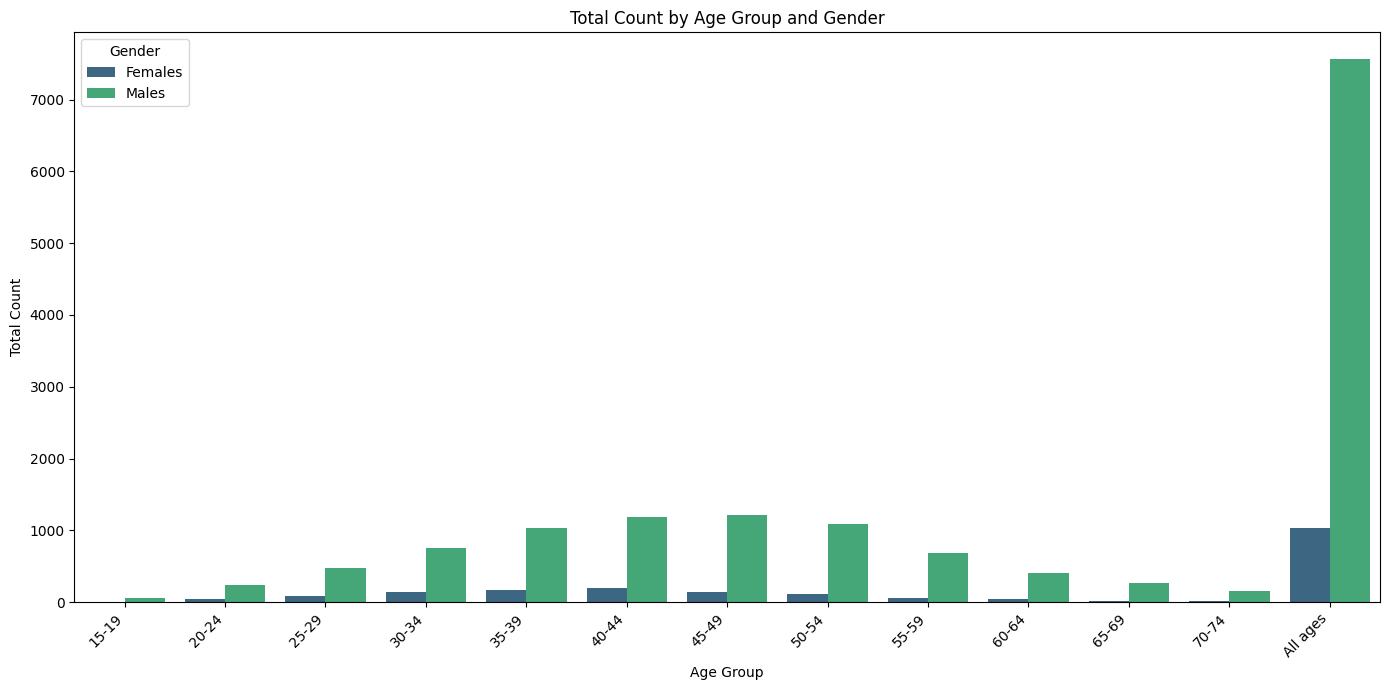

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='age_group', y='Count', hue='sex', data=age_gender_counts, palette='viridis')

plt.title('Total Count by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()